# Bayesianness

Importing the necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize

In [2]:
%matplotlib notebook

Defines the model used for the fitting and the negative log likelihood function of that model.

In [11]:
def Model(x, m, c, Noise=0):
    return m*x + c + Noise

def MinusLogLikelihood(Params, xdata, ydata, σ):
    m, c = Params[0], Params[1]
    Regression = 0
    σSum = 0
    for k in range(len(xdata)):
        Regression += (ydata[k] - Model(xdata[k], m, c))**2
        σSum += σ[k]
    σAverage = σSum/len(xdata)
    return len(xdata)/2*np.log(2*np.pi*σAverage**2) + (2*σAverage**2)**-1*Regression

Creates a random set of numbers normally distributed and inputting it into y.

In [9]:
SetSeed = True

if SetSeed:
    Seed = 923114
    np.random.seed(Seed)

x = np.random.randn(20)
m, c = 2, 3
Noise = np.random.randn(20)
y = Model(x, m, c, Noise)
yError = np.random.random(20)

This minimises each of the parameters and the standard deviation on the normally distributed noise, in the negative log likelihood function. This gives us the "Best fit parameters" for this data.

In [29]:
x0 = [0, 0]
Minimising = minimize(MinusLogLikelihood, x0, args=(x, y, yError))

if Minimising.success:
    Params = Minimising.x
    ParamsError = np.sqrt((np.diag(Minimising.hess_inv)))
    print(f'The fitted parameters are m = {round(Params[0], 3)} ± {round(ParamsError[0], 3)}, '
          f'c = {round(Params[1], 3)} ± {round(ParamsError[1], 3)}, Cov = {round(1000*Minimising.hess_inv[0][1], 3)} x 10^-3')
else:
    print('There was an error when minimising this function')

The fitted parameters are m = 2.172 ± 0.109, c = 3.384 ± 0.124, Cov = 1.813 x 10^-3


An array of aribitrary numbers is created to plot the model with the calculated best fit parameters.

In [14]:
xOutput = np.linspace(min(x), max(x), 1000)
yOutput = Model(xOutput, Params[0], Params[1])

<IPython.core.display.Javascript object>


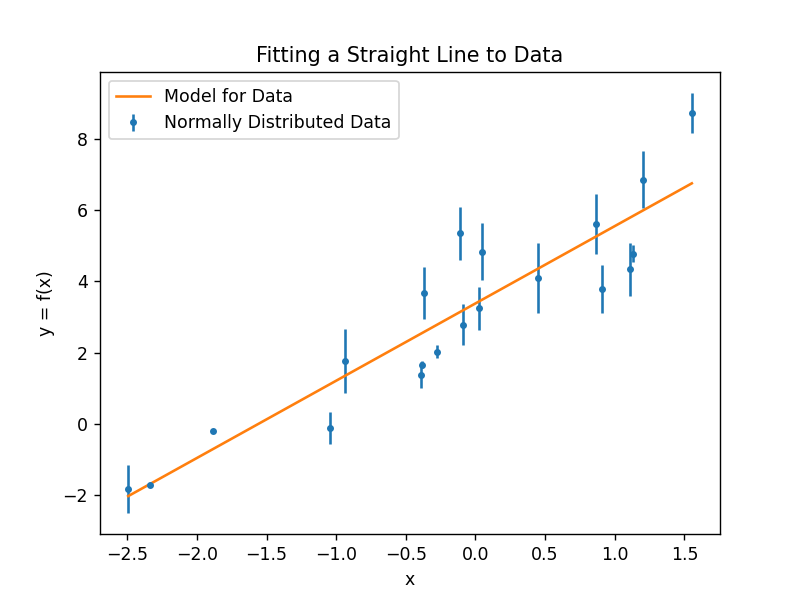

In [15]:
plt.figure()
plt.errorbar(x, y, yerr=yError, fmt='.', label='Normally Distributed Data')
plt.plot(xOutput, yOutput, label='Model for Data')
plt.title('Fitting a Straight Line to Data')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend()
plt.show()

## It's Covariancin' Time

In [16]:
Cov = Minimising.hess_inv[0][1]
print(f'Better Covariance = {round(1000*Cov, 2)} x 10^-3')

Better Covariance = 1.81 x 10^-3


In [17]:
mVar = Minimising.hess_inv[0][0]
cVar = Minimising.hess_inv[1][1]
print(Minimising.hess_inv)

[[0.01197826 0.00181293]
 [0.00181293 0.01548954]]


Plotting m and c in parameter space with their uncertainties

In [18]:
def ParameterSpace(C):
    M = (Y - C)/X
    return M

In [19]:
X = np.linspace(-5, 5, 1000)
Y = Params[0]*X + Params[1]

In [20]:
C = np.linspace(0, 5, 1000)
M = ParameterSpace(C)

<IPython.core.display.Javascript object>


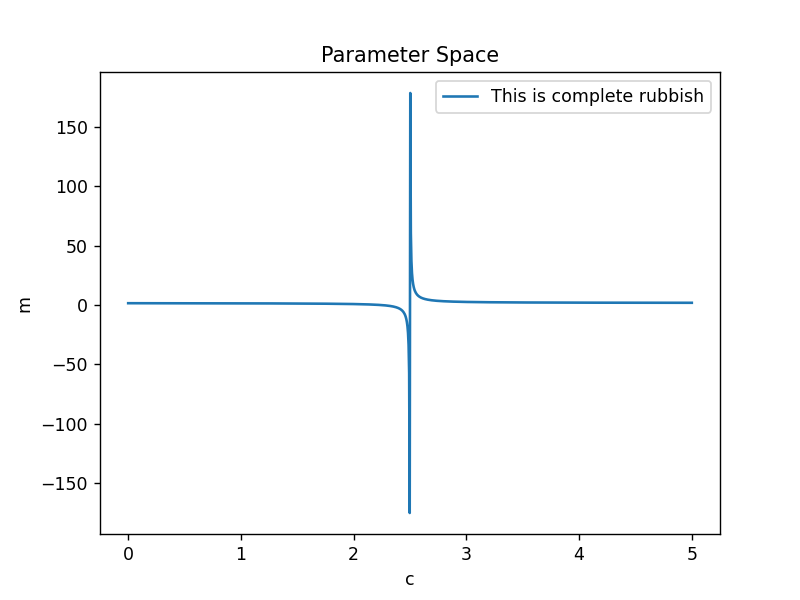

In [21]:
plt.figure()
plt.plot(C, M, label='This is complete rubbish')
plt.xlabel('c')
plt.ylabel('m')
plt.title('Parameter Space')
plt.legend()
plt.show()